<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tratamiento-de-valores-nulos" data-toc-modified-id="Tratamiento-de-valores-nulos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tratamiento de valores nulos</a></span></li><li><span><a href="#Eliminacion-de-filas-con-valores-nulos" data-toc-modified-id="Eliminacion-de-filas-con-valores-nulos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Eliminacion de filas con valores nulos</a></span><ul class="toc-item"><li><span><a href="#Imputar-los-valores-perdidos-para-la-variable-continua" data-toc-modified-id="Imputar-los-valores-perdidos-para-la-variable-continua-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imputar los valores perdidos para la <code>variable continua</code></a></span><ul class="toc-item"><li><span><a href="#fillna()" data-toc-modified-id="fillna()-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span><code>fillna()</code></a></span></li><li><span><a href="#replace()" data-toc-modified-id="replace()-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>replace()</a></span></li></ul></li><li><span><a href="#Imputar-los-valores-perdidos-de-una-variable-categórica" data-toc-modified-id="Imputar-los-valores-perdidos-de-una-variable-categórica-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Imputar los valores perdidos de una <code>variable categórica</code></a></span></li></ul></li></ul></div>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("datos/steam_con_nulos.csv", index_col = 0)

# es un dataset muy grande y tarda mucho en cargar, por lo que vamos a trabajar con una muestra
df = df.sample(1000)
df.head(2)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,clasificacion
3962,325870.0,Clash of Puppets,2014-12-16,Yes,Drakkar Dev,Crescent Moon Games,windows,0.0,Single-player;Steam Achievements;Full controll...,Action;Indie,Action;Indie;Horror,60,NaN,16.0,0,0,0-20000,3.99,Average
10404,512420.0,Wave Magic VR,2016-12-29,Yes,Overrun Games,Overrun Games,windows,0.0,Single-player;Steam Trading Cards,Action;Indie;RPG;Early Access,Early Access;Action;Indie,0,16.0,7.0,0,0,0-20000,4.79,Average


# Tratamiento de valores nulos

Los datos suelen tener muchos valores perdidos o valores nulos. La causa de esto puede ser la corrupción de los datos o la falta de registro de los mismos. El tratamiento de los datos que faltan es esencial durante el preprocesamiento de nuestro conjunto de datos. 

El proceso de rellenar los datos que faltan con un determinado método estadístico se conoce como **imputación** y tiene una gran variedad de opciones. 

En este jupyter veremos como podemos hacer frente a este tipo de valores y como podemos reducir su número al menor posible. Lsa principales formas que tenemos para hacer son: 

- Eliminación de filas con valores perdidos


- Imputar los valores perdidos para la variable continua


- Imputar los valores perdidos de una variable categórica


- Otros métodos de imputación (los veremos en la siguiente lección)

In [6]:
# como en este jupyter vamos a trabajar con nulos, lo primero que vamos a hacer es calcular el porcentaje de nulos 
## que tenemos en nuestro dataframe

nulos = pd.DataFrame((df.isnull().sum() * 100) / df.shape[0]).reset_index()
nulos.columns = ["columna", "porcentaje"]
nulos

,columna,porcentaje
0,appid,1.0
1,name,0.8
2,release_date,0.3
3,english,0.0
4,developer,10.2
5,publisher,9.1
6,platforms,0.0
7,required_age,2.4
8,categories,0.0
9,genres,0.0


Si nos fijamos en nuestro *dataset* no tenemos un gran número de nulos. Aún así nos encontramos con columnas que tienen nulos y lo ideal es que tengamos el menor número de nulos. 

En este caso están involucradas tanto variables numéricas como de tipo *string* y la forma en la que lidiaremos con estos nulos será diferente. 

# Eliminacion de filas con valores nulos 

Los valores nulos se pueden manejar eliminando las filas o columnas que tienen valores nulos. 

- Si las **columnas** tienen más de la mitad de las filas como nulos, se puede eliminar toda la columna. 


- En el caso de las **filas**, aquellas que tienen uno o más valores de columnas como nulos también pueden ser eliminadas.

Este forma de eliminar nulos tiene los siguientes pros y contras: 

|Pros   |   Contras|  
|---|---|
| Un modelo entrenado con la eliminación de todos los valores perdidos crea un modelo robusto. |  Pérdida de mucha información. |  
|   | Funciona mal si el porcentaje de valores perdidos es excesivo en comparación con el conjunto de datos completo. | 


En este caso usaremos el método `dropna` de Pandas. Su sintaxis es: 

```python
MiDataFrame.dropna(axis=0, how='any', subset=None, inplace=False)
```

Donde: 

- `axis`: por defecto 0. Determina si las filas o las columnas tienen valores nulos

    - 0: elimina las filas que tienen valores nulos. 
    
    - 1: elimina las columnas que tienen valores nulos. 




- `how`:  por defecto 'any'. Determina si la fila o la columna tiene al menos un NaN o todos. 

    - any : si hay algún valor NA, se elimina esa fila o columna.

    - all : si todos los valores son NA, se elimina esa fila o columna.


- `subset`:opcional.Columna o lista de columnas sobre las que queremos queremos aplicar el dropna. Es decir, se chequeará si las columnas pasadas tienen nulos, y en función del parámetro `how` se eliminaran. 


- `inplace`: por defecto False

    - Si es True, realiza la operación inplace y devuelve None.



In [7]:
# en este caso haremos un dropna de todo el dataframe donde al menos haya un nulo

df_sin_nulos = df.dropna(how = "any")

In [8]:
# chequeemos si seguimos teniendo valores nulos

df_sin_nulos.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
clasificacion       0
dtype: int64

Sin embargo, también podemos eliminar los nulos en función de una columna. En nuestro *dataset* que es de opiniones de videojuegos poco sentido tiene tener filas sin el nombre de los juegos. Por lo tanto, en este caso tendría sentido eliminar todos los nulos que nos encontremos en esa columna. 

Lo haremos de la misma forma, usando el método `dropna` pero en este caso tendremos que especificar sobre que columna queremos que aplique el "filtro". 

Veámoslo con un ejemplo: 

In [9]:
df.dropna(subset= ["name"], how = "any", inplace = True)
df.reset_index(inplace = True)

In [10]:
# Perfecto! hemos consegido eliminar los nulos de la columna "name"
df.isnull().sum()

index                 0
appid                10
name                  0
release_date          3
english               0
developer           100
publisher            91
platforms             0
required_age         24
categories            0
genres                0
steamspy_tags         7
achievements          0
positive_ratings     54
negative_ratings     39
average_playtime      0
median_playtime       0
owners               55
price                 0
clasificacion         0
dtype: int64

## Imputar los valores perdidos para la `variable continua`

Las columnas del *dataframe* que tienen valores numéricos continuos pueden sustituirse por la media, la mediana o la moda de los valores restantes de la columna. Este método puede evitar la pérdida de datos en comparación con el método anterior. La sustitución de las dos aproximaciones anteriores (media y mediana) es un enfoque estadístico para tratar los valores que faltan.


|Pros   |   Contras|  
|---|---|
| Evita la pérdida de datos que supone la eliminación de filas o columnas|Sólo funciona con variables numéricas continuas. |
| Funciona bien con un pequeño conjunto de datos y es fácil de implementar.  |  Puede ocasionar pérdida de datos| 
 

Esto lo podremos hacer de dos formas: 

- Usando el método `fillna` 


- Usando el método `replace`

📌 Nos podemos preguntar 🤔 en que basamos nuestra decisión para reemplazar los valores nulos por la media, la mediana.

Si bien es cierto que no hay una fórmula mágica para esto, podriamos decir que: 

- Si nuestros datos están mas o menos agrupados y no presentan una gran desviación podríamos usar la media



- Si nuestros presentan una desviación muy grande, en ese caso lo normal sera usar la mediana. 

Recordamos que para saber como es la distribución de nuestros datos, el mejor plot es el histograma. 

In [11]:
nulos.sample(7)

,columna,porcentaje
15,median_playtime,0.0
10,steamspy_tags,0.7
7,required_age,2.4
14,average_playtime,0.0
3,english,0.0
1,name,0.8
13,negative_ratings,4.0


### `fillna()`

Rellena los nulos de nuestro *dataframe* o columna especificada basándose en el método especificado. 

```python
# si queremos cambiar todos los nulos de nuestro dataframe

MiDataFrame.fillna(value=None,  axis=None, inplace=False)
```

```python
# si queremos cambiar solo los valores de una columna
MiDataFrame["columna"].fillna(value=None,  axis=None, inplace=False)
```

Donde: 

- `value`: por defecto `NaN`. Es el valor por el que queremos reemplazar los valores nulos. Puede ser un escalar, dicconario, Serie o DataFrame. Lo más usual es que lo reemplacemos por un escalar, es decir, un valor numérico. 


- `axis`: por defecto 0. Determina si las filas o las columnas tienen valores nulos

    - 0: elimina las filas que tienen valores nulos. 
    
    - 1: elimina las columnas que tienen valores nulos. 
    

- `inplace`: por defecto False

    - Si es True, realiza la operación inplace y devuelve None.

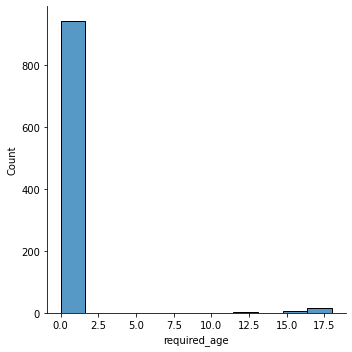

In [12]:
# lo primero que hacemos es ver como esta distribuida  nuestra columna

sns.displot(df['required_age']);

Como vemos, nuestros datos están muy dispersos, es decir, tenemos muchos datos en 0 años y luego algunos de los 17. Si usaramos la media no estaríamos usando un valor que realmente representará la realidad de las edad requerida para nuestros juegos. Por lo que en este caso deberíamos usar la mediana o incluso la moda. 

In [13]:
# lo haremos con la mediana

df['required_age'].fillna(df['required_age'].median ,inplace = True)

In [14]:
# chequeamos si tenemos valores nulos en la columna de edad

df.isnull().sum()

index                 0
appid                10
name                  0
release_date          3
english               0
developer           100
publisher            91
platforms             0
required_age          0
categories            0
genres                0
steamspy_tags         7
achievements          0
positive_ratings     54
negative_ratings     39
average_playtime      0
median_playtime       0
owners               55
price                 0
clasificacion         0
dtype: int64

In [15]:
df.head(1)

,index,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,clasificacion
0,3962,325870.0,Clash of Puppets,2014-12-16,Yes,Drakkar Dev,Crescent Moon Games,windows,0.0,Single-player;Steam Achievements;Full controll...,Action;Indie,Action;Indie;Horror,60,NaN,16.0,0,0,0-20000,3.99,Average


### replace()

Este método ya lo conocimos cuando vimos Pandas. A modo de recordatorio, este metodo nos va a permitir reemplazar un valor que nosotros queremos por uno que especifiquemos. En este caso reemplazaremos los nulos por la  media, la moda, la mediana etc. 

Para recordar su sintaxis: 

```python
MiDataFrame.replace(valor_a_reemplazar, por_que_reemplazamos, inplace=False, regex=False)
```

In [17]:
# en este caso trabajarems con las columnas de "positive_rattings" y "negative_rattings"

df["positive_ratings"].replace(np.nan, df["positive_ratings"].median(), inplace = True)
df["negative_ratings"].replace(np.nan, df["negative_ratings"].median(), inplace = True)

In [18]:
# Perfecto! Ya no tenemos nulos en estas columnas!!!

df.isnull().sum()

index                 0
appid                10
name                  0
release_date          3
english               0
developer           100
publisher            91
platforms             0
required_age          0
categories            0
genres                0
steamspy_tags         7
achievements          0
positive_ratings      0
negative_ratings      0
average_playtime      0
median_playtime       0
owners               55
price                 0
clasificacion         0
dtype: int64

## Imputar los valores perdidos de una `variable categórica`

Cuando los valores que faltan provienen de columnas categóricas (de *strings* o numéricas), los valores que faltan pueden ser sustituidos por la categoría más frecuente. 

Además, si el número de valores que faltan es muy grande, puede sustituirse por una nueva categoría.

|Pros   |   Contras|  
|---|---|
|Evita la pérdida de datos que supone la eliminación de filas o columnas |Sólo funciona con variables categóricas.|
|Funciona bien con un pequeño conjunto de datos y es fácil de implementar.  |  Se añaden nuevas categorías a nuestro datos, las cuales no derivan directamente de nuestros datos. |
|Evita la pérdida de datos al añadir una categoría única||

En este caso podríamos hacer dos cosas: 

- Crear una nueva categoría dentro de nuestros datos, por ejemplo una que fuera "Unkown" 


- Reemplazar con el valor que más se repite dentro de la columna. 

Entre las variables categóricas de tipo *string* nos encontramos con las columnas `developer` y `publisher` que tenían un 10% de los datos nulos. Como el % de nulos es relativamente alto, en este caso lo que haremos será reemplazar los nulos por una nueva categoría. 

Usaremos el método `replace`

In [19]:
nulos[(nulos["columna"] == "developer") | (nulos["columna"] == "publisher")]

,columna,porcentaje
4,developer,10.2
5,publisher,9.1


In [20]:
df["developer"].replace(np.nan, "Unknow", inplace = True)
df["publisher"].replace(np.nan, "Unknow", inplace = True)

In [21]:
# ¿Qué ha pasado con los nulos de estas columnas? Ya nos los tenemos! 

df.isnull().sum()

index                0
appid               10
name                 0
release_date         3
english              0
developer            0
publisher            0
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        7
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners              55
price                0
clasificacion        0
dtype: int64

Por otro lado, teníamos la columna `categories` que solo tenia un 0.1 % de nulos. En este caso lo que haremos será reemplazar esos nulos por el valor más repetido de esa columna, es decir, la moda. 

In [22]:
nulos[nulos["columna"] == "categories" ]

,columna,porcentaje
8,categories,0.0


In [23]:
# sacamos la moda de la columnna de interés
df.categories.mode()[0]

'Single-player'

Con esto hemos visto que la moda de la columna `categories` es "Single-player". Bien, teniendo esta información procederemos a reemplazar los nulos por este valor:

In [24]:
df["categories"].replace(np.nan, df.categories.mode()[0], inplace = True)

In [25]:
# chequeamos los valores nulos:

df.isnull().sum()

index                0
appid               10
name                 0
release_date         3
english              0
developer            0
publisher            0
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        7
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners              55
price                0
clasificacion        0
dtype: int64

También lo podríamos hacer con un `fillna` 

```python
df['categories'].fillna(df['categories'].mode()[0], inplace = True)
```


**EJERCICIOS**

En este ejercicio seguiremos trabajando con el *dataset* de las otras actividades. Cárgalo y no te olvides de importar las librerías que necesitemos

- 1️⃣ Antes de empezar, debemos chequear cuántos valores nulos tenemos en nuestro dataframe. 

    **NOTA**: Hemos visto dos formas de sacar los nulos en un dataset. Hazlo de las dos formas
    
En nuestro caso tenemos columnas numéricas y categóricas con valores nulos. 

- 2️⃣ En primer lugar trabajaremos con las variables categóricas. Hemos aprendido dos métodos para eliminar los valores nulos en este tipo de variables(crear una nueva categoría y reemplazar con la categoría que más se repite). Identifica las variables categóricas y emplea los dos métodos que aprendimos para eliminar nulos. 


- 3️⃣ Elige 3 columnas de tipo numérico y reemplaza los nulos de esas columnas. Usa un for loop para hacer la imputación de los nulos en estas columnas. 

